<a href="https://colab.research.google.com/github/mr-cri-spy/Deep-Learning-projects/blob/main/CNN_Cat_%26_Dog_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/dataset_new.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('finish')

finish


In [ ]:
import keras
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import *
import numpy as np

In [ ]:
# https://keras.io/api/preprocessing/image/#imagedatagenerator-class
## data augmentation - generating more samples of images

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/dataset_new/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')
test_set = test_datagen.flow_from_directory('/content/dataset_new/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
### Creating model and layers
model = Sequential();   ## blank model
# Step 1 - Convolution
model.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))   ## applied for under/over fitting
# Step 1 - Convolution
model.add(Conv2D(64,(3,3),activation='relu'))
# Step 2 - Pooling
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
# Step 2 - Pooling
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
# Step 3 - Flattening
model.add(Flatten())
### output
# Step 4 - Full connection
model.add(Dense(1, activation='sigmoid'))   ## output layer
# Compiling the CNN
model.compile(optimizer ='adam',loss='binary_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.fit(training_set,
          epochs = 200,
          steps_per_epoch=2000//32,
          validation_steps=500//32,
          validation_data = test_set)

Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


62/62 ━━━━━━━━━━━━━━━━━━━━ 16s 162ms/step - accuracy: 0.5157 - loss: 0.7040 - val_accuracy: 0.5000 - val_loss: 0.6911
Epoch 2/200
 1/62 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5000 - loss: 0.6881

/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5000 - loss: 0.6881 - val_accuracy: 0.5000 - val_loss: 0.6938
Epoch 3/200
62/62 ━━━━━━━━━━━━━━━━━━━━ 12s 97ms/step - accuracy: 0.5281 - loss: 0.6899 - val_accuracy: 0.5583 - val_loss: 0.6853
Epoch 4/200
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - accuracy: 0.5000 - loss: 0.6853 - val_accuracy: 0.6000 - val_loss: 0.6884
Epoch 5/200
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 0.5933 - loss: 0.6741 - val_accuracy: 0.5938 - val_loss: 0.6673
Epoch 6/200
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - accuracy: 0.5625 - loss: 0.6501 - val_accuracy: 0.9000 - val_loss: 0.6018
Epoch 7/200
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 75ms/step - accuracy: 0.6173 - loss: 0.6530 - val_accuracy: 0.6417 - val_loss: 0.6265
Epoch 8/200
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - accuracy: 0.6562 - loss: 0.6685 - val_accuracy: 0.7500 - val_loss: 0.5883
Epoch 9/200
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.6754 - loss: 0.6022 - val_accuracy: 0.6458 - v

In [ ]:
model.save("catdog.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[1.]]


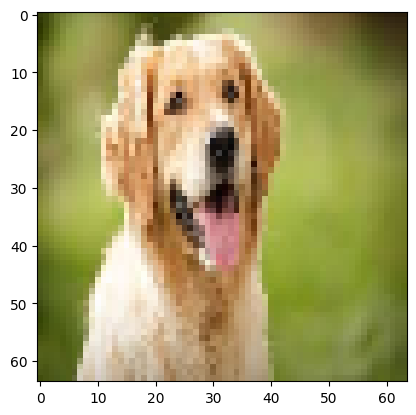

In [ ]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread("/content/dog.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = cv2.resize(img,(64,64))
img = img/255
print(model.predict(np.array([img])).round())
plt.imshow(img);

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
[[1.]]


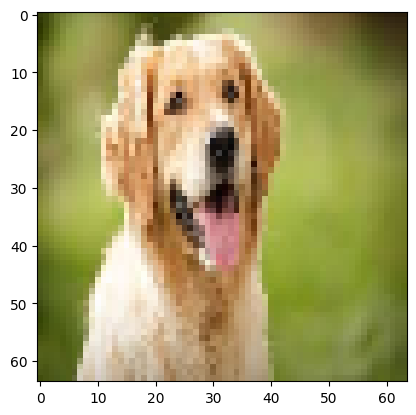

In [ ]:
import cv2
import matplotlib.pyplot as plt
mymodel = keras.models.load_model("/content/catdog.h5")
img = cv2.imread("/content/dog.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = cv2.resize(img,(64,64))
img = img/255
print(mymodel.predict(np.array([img])).round())
plt.imshow(img);